In [1]:
import pandas as pd
import os

#### Task #1-: Merge the 12 months 0f sales data into a single CSV file

In [2]:
folder = r"C:\Users\chirag tomar\PycharmProjects\JupyterProject\data\Sales_Data"

files = [file for file in os.listdir(folder) if file.endswith(".csv")]

all_months_Data = pd.DataFrame()

for file in files:
    df=pd.read_csv(os.path.join(folder,file))
    all_months_Data = pd.concat([all_months_Data,df])

all_months_Data.to_csv("all_data.csv",index=False)

# I . **_Read in updated dataframe_**

In [3]:
df= pd.read_csv("all_data.csv")

In [4]:
df.shape

(186850, 6)

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# II . **_Data Wrangling_**

Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### To check the rows which contains NaN values

In [7]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropping all the rows which contains atleast one NaN column

In [8]:
df=df.dropna(how="any")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Checking data types of column

In [9]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Correcting the data types of column "Quantity Ordered and Price Each" to numeric

In [10]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"],errors ="coerce")
df["Price Each"] = pd.to_numeric(df["Price Each"],errors="coerce")
df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Augment data with additional columns

#### Task #2 -: Add Month Column

In [11]:
df = df[df["Order Date"].str[0:2] != "Or"]

In [12]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")
df.head()

C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\1474737020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Order Date"].str[0:2]
C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\1474737020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Month"].astype("int32")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task #3 -: Add Sales Column

In [13]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\36583962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = df["Quantity Ordered"] * df["Price Each"]


#### Task #4 Add a City Column

In [18]:
# Lets use .apply()
df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1])

C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\3238140480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1])


In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### Question 1 : What was the best month for sales? How much was earned that month?

In [15]:
results = df.groupby("Month")["Sales"].sum()
results

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

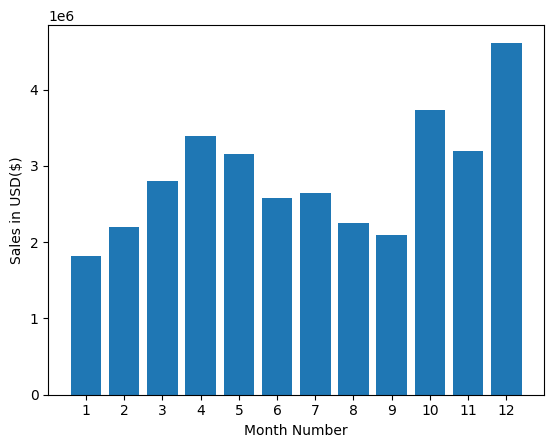

In [16]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results)
plt.xticks(months)
plt.xlabel("Month Number")
plt.ylabel("Sales in USD($)")
plt.show()

#### Q2. Which city has the highest number of sales?

In [25]:
results1 = df.groupby("City").sum()

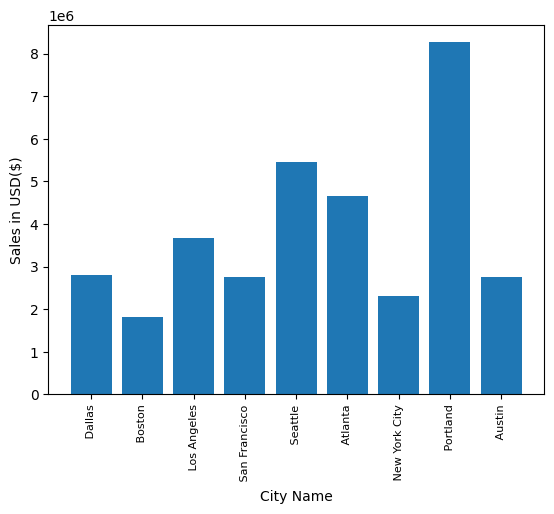

In [27]:
Cities = df["City"].unique()

plt.bar(Cities,results1["Sales"])
plt.xticks(Cities,rotation ="vertical",size=8)
plt.xlabel("City Name")
plt.ylabel("Sales in USD($)")
plt.show()

#### Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [30]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\809913259.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])
C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\809913259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Date"] = pd.to_datetime(df["Order Date"])


In [39]:
# Creating a column named "Hour" and "Minute" to extract the time in hr and Minute
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
df.head()

C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\3688543061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Order Date"].dt.hour
C:\Users\chirag tomar\AppData\Local\Temp\ipykernel_10740\3688543061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Minute"] = df["Order Date"].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


#### Q3. What time should we display advertisements to maximize likelihood of customer's buying product?


In [37]:
results2 = df.groupby("Hour")["Sales"].sum()
results2

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

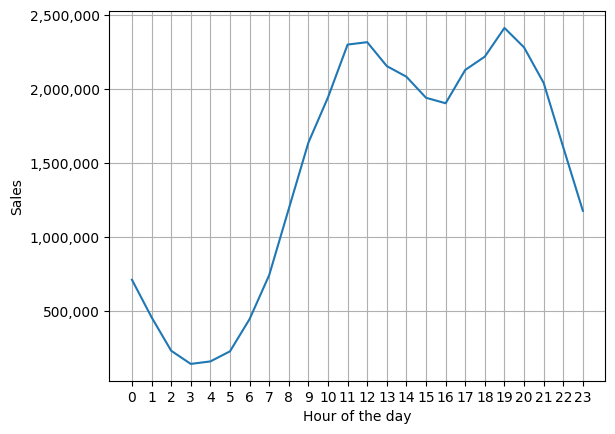

In [45]:
import matplotlib.ticker as mticker
hours = range(0,24)
plt.plot(hours,results2)
plt.xticks(hours)
plt.xlabel("Hour of the day")
plt.ylabel("Sales")

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.grid()
plt.show()

# My Recommendation is around 11am(11) or 7pm(19)

#### Q4. What Product sold the most? Why do you think it sold the most?

In [68]:
product_group = df.groupby("Product")[["Quantity Ordered","Sales"]].sum()
product_group.sort_values("Quantity Ordered",ascending=False)

,Quantity Ordered,Sales
Product,,
AAA Batteries (4-pack),31017.0,92740.83
AA Batteries (4-pack),27635.0,106118.40
USB-C Charging Cable,23975.0,286501.25
Lightning Charging Cable,23217.0,347094.15
Wired Headphones,20557.0,246478.43
Apple Airpods Headphones,15661.0,2349150.00
Bose SoundSport Headphones,13457.0,1345565.43
27in FHD Monitor,7550.0,1132424.50
iPhone,6849.0,4794300.00


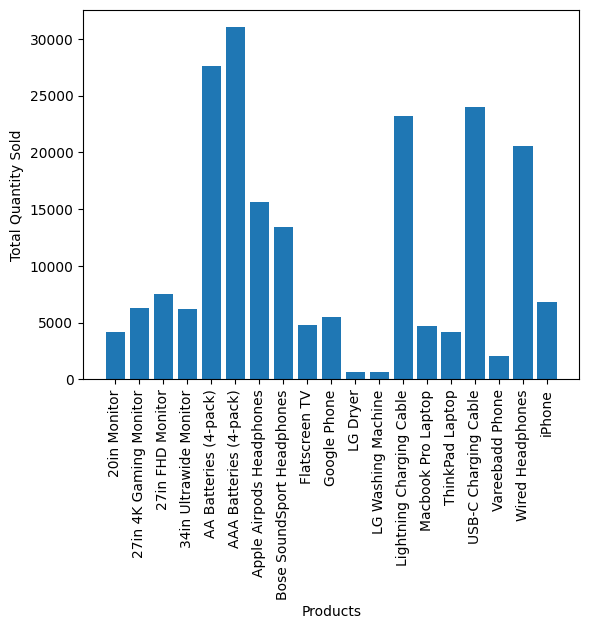

In [67]:
plt.bar(product_group.index,product_group["Quantity Ordered"])

plt.xlabel("Products")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.show()

In [69]:
prices = df.groupby("Product")["Price Each"].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#                                 COMPLETED